In [236]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import sys
import scipy as sp

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''
print(os.environ['CUDA_VISIBLE_DEVICES'])

In [3]:
sys.path.append('../src/cWGAN/')
import model

In [4]:
save_dir = '../models/cWGAN/Run_MNIST2020-12-03_28/'
assert(os.path.isdir(save_dir))

In [14]:
losses = []
with open(save_dir+'losses.txt', 'r') as f:
    for _ in range(200000):
        line = f.readline()
        start = int(line.find('('))
        end = int(line.find(','))
        if start > 0:
            losses.append(float(line[start+1:end]))

In [21]:
critic_losses = []
with open(save_dir+'critic_losses.txt', 'r') as f:
    for _ in range(830000):
        line = f.readline()
       # print(line)
        start = int(line.find('('))
        end = int(line.find(','))
        if start > 0:
            critic_losses.append(-float(line[start+1:end]))

In [24]:
print(len(losses))
print(len(critic_losses))
print(16200*50)
x = np.arange(0, 16200)
x = x*50
#print(x)

16200
810000
810000


In [250]:
new_losses = sp.ndimage.median_filter(losses, size=10)

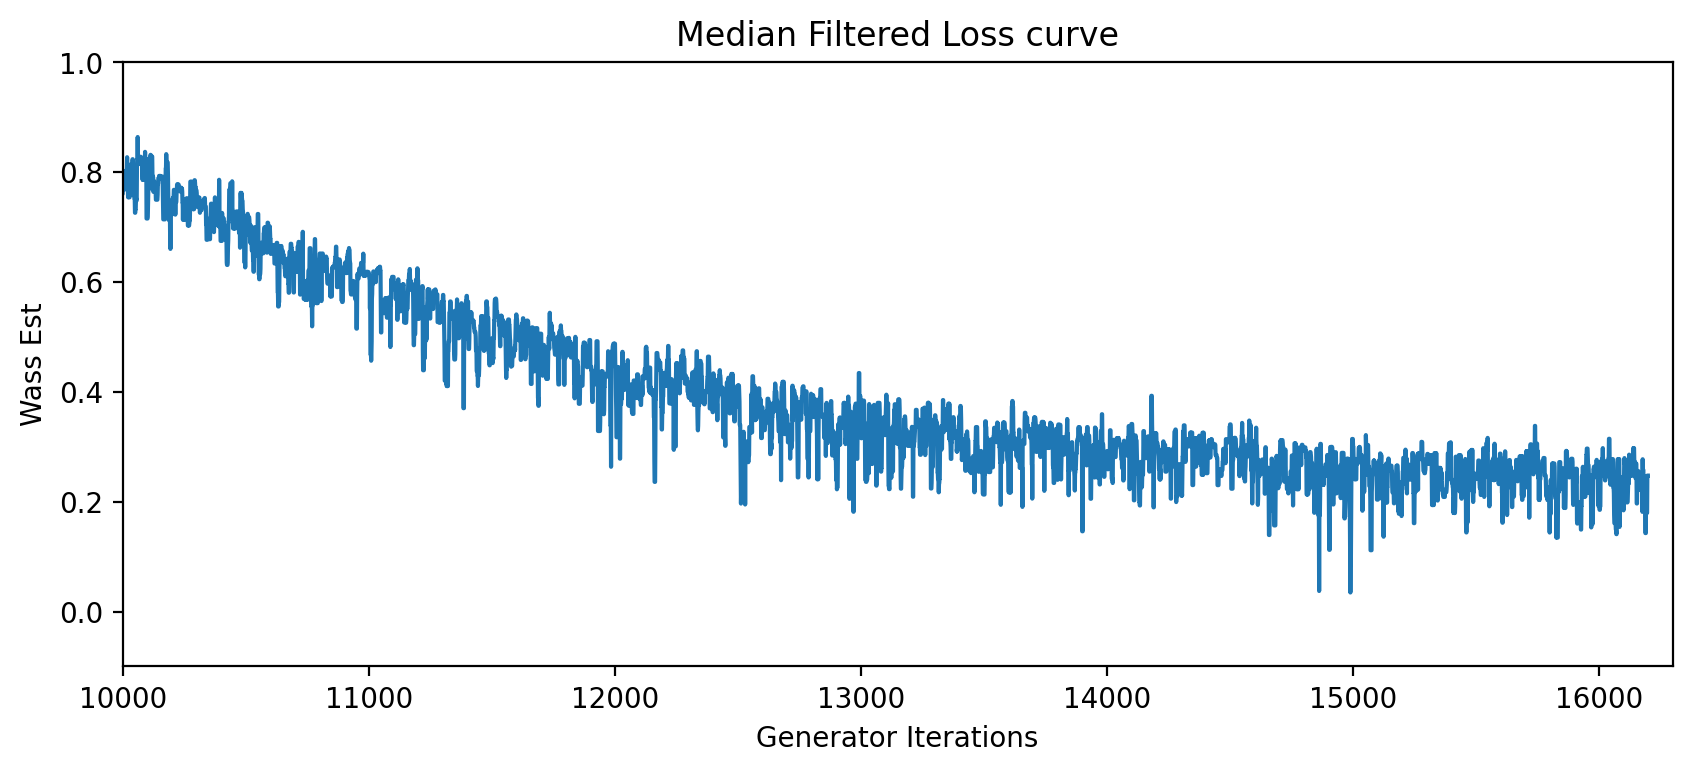

In [330]:
fig = plt.figure(figsize=(10,4), dpi=200)
ax = fig.add_subplot(111)

n = 15
start = 50*n
end = 50*(n+1)
#ax.plot(critic_losses, label='critic loss', alpha=0.7)
#ax.scatter(x, losses, s=10, color='r', label='generator loss')
ax.plot(new_losses)
ax.set_xlim(10000, 16300)
ax.set_ylim(-0.1, 1)
ax.set_xlabel("Generator Iterations")
ax.set_ylabel("Wass Est")
ax.set_title("Median Filtered Loss curve")
#ax.legend()
plt.show()

In [74]:
cwgan = model.cWGAN_mnist(5, 64, 100)

Initializing network
<class 'int'>


In [331]:
cwgan.generator.load_weights(save_dir + '/training_checkpoints/gen_10')

In [324]:
noise = np.random.uniform(size=(1, 100))

In [205]:
print(noise)

[[0.15806386 0.07087121 0.96836573 0.29119377 0.03279366 0.89682774
  0.43552239 0.35362696 0.84994753 0.73740306 0.21635482 0.59339643
  0.90526258 0.00212905 0.7831725  0.23495946 0.89078691 0.00351622
  0.62204948 0.37073948 0.10256961 0.64785095 0.6784968  0.39986222
  0.9827854  0.0101317  0.69502679 0.04875389 0.96620745 0.36505931
  0.10789586 0.72814843 0.20926914 0.62180787 0.6125473  0.22850693
  0.72206889 0.78470747 0.656707   0.91541104 0.13397372 0.23214743
  0.2940216  0.77731439 0.80144961 0.26559199 0.57758448 0.52369431
  0.56804812 0.84581921 0.88564651 0.14884849 0.61793916 0.3207359
  0.50777482 0.74565697 0.30439884 0.81902921 0.10685258 0.51101423
  0.64220141 0.06013533 0.60055747 0.93301586 0.99170381 0.20640228
  0.10424433 0.56888851 0.85098663 0.81128445 0.73862895 0.70882854
  0.03300518 0.46390474 0.95027391 0.51702698 0.39796402 0.3173888
  0.31891003 0.92591257 0.80325062 0.58614828 0.26470194 0.91244721
  0.61126468 0.14225017 0.36592094 0.70868213 0.53

In [206]:
number_labels = np.zeros((1, 10))
number_labels[0, 8] = 1
print(number_labels)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [207]:
pred = cwgan.generator([number_labels, noise])

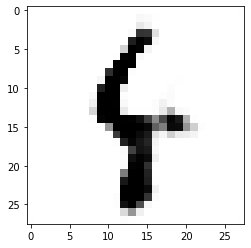

In [208]:
plt.imshow(pred[0], cmap='Greys')
plt.show()

In [209]:
noise = np.random.uniform(size=(1, 100))
number_labels = np.zeros((1, 10))
number_labels[0, 4] = 1
print(number_labels)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


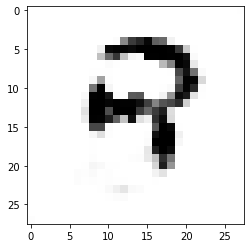

In [210]:
pred = cwgan.generator([number_labels, noise])
plt.imshow(pred[0], cmap='Greys')
plt.show()

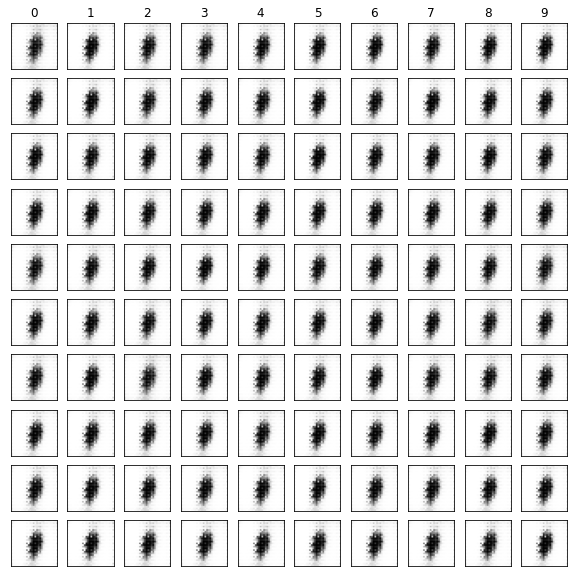

In [332]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    number_labels = np.zeros((1, 10))
    number_labels[0, i] = 1
    for j in range(10):
        noise = np.random.uniform(size=(1, 100))
        pred = cwgan.generator([number_labels, noise])
        axs[j, i].imshow(pred[0], cmap='Greys')
        axs[j, i].get_yaxis().set_visible(False)
        axs[j, i].get_xaxis().set_visible(False)
        if j==0:
            axs[j, i].set_title(i)
plt.show()